In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92,45,27.0,31.0,0.0
1,85,64,59,32.0,23.0,0.0
2,86,54,33,16.0,54.0,0.0
3,91,78,34,24.0,36.0,0.0
4,98,55,13,NaN,17.0,0.0
...,...,...,...,...,...,...
340,91,54,25,22.0,35.0,4.0
341,89,48,32,NaN,14.0,4.0
342,85,52,22,23.0,34.0,4.0
343,95,93,21,27.0,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
float64		column 4	69
float64		column 5	34
float64		column 6	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,345.000000,345.000000,345.000000,276.000000,311.000000,345.000000
mean,90.159420,69.869565,30.405797,24.000000,38.466238,3.455072
std,4.448096,18.347670,19.512309,8.704858,38.959176,3.337835
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,48.000000,6.000000
max,103.000000,138.000000,155.000000,78.000000,297.000000,20.000000


<AxesSubplot:>

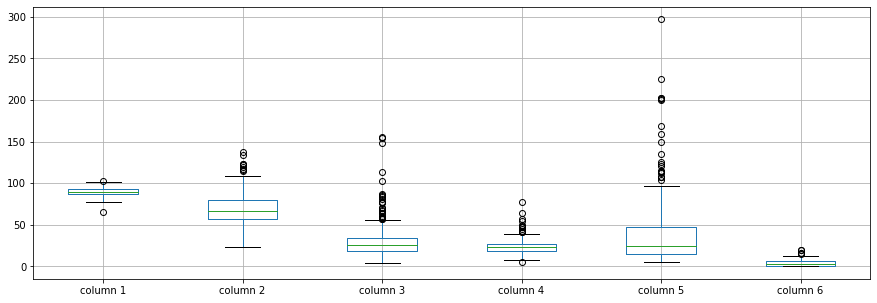

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.159420
column 2    69.869565
column 3    30.405797
column 4    24.000000
column 5    38.466238
column 6     3.455072
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.044103,0.147695,0.166160,0.202905,0.312680
column 2,0.044103,1.000000,0.076208,0.166107,0.115253,0.100796
column 3,0.147695,0.076208,1.000000,0.573168,0.519757,0.206848
column 4,0.166160,0.166107,0.573168,1.000000,0.470198,0.278492
column 5,0.202905,0.115253,0.519757,0.470198,1.000000,0.343197
column 6,0.312680,0.100796,0.206848,0.278492,0.343197,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+16,6+16+16,6+16+16+16,6+16+16+16+16,6+16+16+16,6+16+16,6+16,6], vae_layer = False, seed = 160)
imputer.build_model(df)
imputer.train_model(training_epochs=16)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 270.0462290445964
Epoch: 1 , loss: 270.22967020670575
Epoch: 2 , loss: 268.8628990536644
Epoch: 3 , loss: 270.149657476516
Epoch: 4 , loss: 267.8129359654018
Epoch: 5 , loss: 269.7636290050688
Epoch: 6 , loss: 269.05475144159226
Epoch: 7 , loss: 268.1073506673177
Epoch: 8 , loss: 269.412359328497
Epoch: 9 , loss: 268.59551420665923
Epoch: 10 , loss: 268.84468950544084
Epoch: 11 , loss: 270.5425342378162
Epoch: 12 , loss: 269.19662184942337
Epoch: 13 , loss: 267.9933544340588
Epoch: 14 , loss: 269.18475269135973
Epoch: 15 , loss: 268.8733702160063
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    47.000000
column 3    28.000000
column 4    15.000000
column 5     0.020302
column 6     0.500000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0,0,0,0.000000,0.0,0.0
1,0,0,0,0.000000,0.0,0.0
2,0,0,0,0.000000,0.0,0.0
3,0,0,0,0.000000,0.0,0.0
4,0,0,0,-16.959864,0.0,0.0
...,...,...,...,...,...,...
340,0,0,0,0.000000,0.0,0.0
341,0,0,0,-21.975949,0.0,0.0
342,0,0,0,0.000000,0.0,0.0
343,0,0,0,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

411.5800117794849

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [18]:
NRMS=numerator/denominator
NRMS


0.1633408221733686

In [19]:
new_df.iloc[66,:]

column 1    86.000000
column 2    54.000000
column 3    20.000000
column 4     0.035399
column 5    16.000000
column 6     2.000000
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92,45,27.000000,31.0,0.0
1,85,64,59,32.000000,23.0,0.0
2,86,54,33,16.000000,54.0,0.0
3,91,78,34,24.000000,36.0,0.0
4,98,55,13,0.040136,17.0,0.0
...,...,...,...,...,...,...
340,91,54,25,22.000000,35.0,4.0
341,89,48,32,0.024051,14.0,4.0
342,85,52,22,23.000000,34.0,4.0
343,95,93,21,27.000000,47.0,6.0


In [21]:
imputations[-1].to_excel("Bupa_AN_5(imp).xlsx", index=False, header=False)